Question 1:

In [37]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])

print(df)

print("Using index:", df['c'][2])

print("Using loc:", df.loc[2, 'c'])

print("Using iloc:", df.iloc[1, 2])

          a         b         c         d
1  0.361394  1.719217  0.212070 -0.390449
2  1.153317 -3.544392  1.442544  0.647478
3 -0.559716 -0.125596  0.811150 -0.100442
4  0.162959  0.997297  1.683122 -1.061002
Using index: 1.4425436245524974
Using loc: 1.4425436245524974
Using iloc: 1.4425436245524974


Question 2:
By using class method "from_diameter" in the "Circle" class we can easily make Circle objects from diameters. This improves readability of our code and makes prosses more convenient by removing the need of calculating the radius from the diameter every time manually. Instead we can directly call the class method with the diameter value and the method takes care of the conversion internally.

In [9]:
class Circle:
    def __init__(self, radius):
        self.radius = radius

    @classmethod
    def from_diameter(cls, diameter):
        return cls(diameter / 2)

Question 4:

In [29]:
import numpy as np

a = np.arange(0, 12)

# Reshape 'a' to a 2x6 matrix
a = a.reshape(2, 6)

# Adjust the elements of 'a' to given
a[0] += 1
a[1] += 20

print(a)

[[ 1  2  3  4  5  6]
 [26 27 28 29 30 31]]


Question 5:

In [28]:
import random

class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, rank, suit):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    def __gt__(self, other):
        return self.RANKS.index(self.rank) > self.RANKS.index(other.rank)

    def __eq__(self, other):
        return self.rank == other.rank

    @property
    def suit(self):
        return self._suit

    @property
    def rank(self):
        return self._rank

    def __str__(self):
        return f"{self.rank}{self.suit}"

    def __repr__(self):
        return self.__str__()

class Deck:
    def __init__(self):
        cards = []
        for rank in Card.RANKS:
            for suit in Card.SUITS:
                card = Card(rank, suit)
                cards.append(card)
        self._cards = tuple(cards)

    @property
    def cards(self):
        return self._cards

    def shuffle(self):
        cards = list(self.cards)
        random.shuffle(cards)
        self._cards = tuple(cards)

class Hand:
    def __init__(self, deck):
        cards = []
        for i in range(5):
            cards.append(deck.cards[i])
        self._cards = tuple(cards)

    def __str__(self):
        return str(self._cards)

    @property
    def cards(self):
        return self._cards

    @property
    def is_flush(self):
        suit = self._cards[0].suit
        for i in range(1, 5):
            if self._cards[i].suit != suit:
                return False
        return True

    @property
    def is_pair(self):
        ranks = [card.rank for card in self.cards]
        for rank in ranks:
            if ranks.count(rank) == 2:
                return True
        return False

    @property
    def is_3_kind(self):
        ranks = [card.rank for card in self.cards]
        for rank in ranks:
            if ranks.count(rank) == 3:
                return True
        return False

    @property
    def is_4_kind(self):
        ranks = [card.rank for card in self.cards]
        for rank in ranks:
            if ranks.count(rank) == 4:
                return True
        return False

    @property
    def is_full_house(self):
        return self.is_3_kind and self.is_pair

    @property
    def is_2_pair(self):
        ranks = [card.rank for card in self.cards]
        ranks = set(ranks)
        return len(ranks) == 3 and not self.is_3_kind

    def sort_hand(self):
        cards = list(self.cards)
        cards.sort()
        print(f"sorted hand is: {cards}")

    @property
    def is_straight(self):
        cards = list(self.cards)
        cards.sort()
        distance = Card.RANKS.index(cards[4].rank) - Card.RANKS.index(cards[0].rank)
        return distance == 4 and not self.is_pair and not self.is_3_kind

# Perform the simulation
draws = 30000
three_of_a_kind_count = 0
for _ in range(draws):
    d = Deck()
    d.shuffle()
    hand = Hand(d)
    if hand.is_3_kind:
        three_of_a_kind_count += 1

# Calculate the probability
probability = (three_of_a_kind_count / draws) * 100

print(f"Probability of getting Three of a Kind in {draws} hands: {probability:.2f}%")


Probability of getting Three of a Kind in 30000 hands: 2.29%


Question 6:

Question 7:


In [31]:
import numpy as np

a = -1
b = 2
c = 8

x_vertex = -b / (2 * a)


y_vertex = a * x_vertex**2 + b * x_vertex + c

print("Vertex coordinates (x, y):", (x_vertex, y_vertex))

Vertex coordinates (x, y): (1.0, 9.0)


Question 8:

In [32]:
class MyClass:
    def __init__(self, x):
        self.x = x

    def regular_method(self):
        return self.x * 2

    def __str__(self):
        return f"MyClass instance with x = {self.x}"

obj = MyClass(5)

print(obj.regular_method())

print(obj)


10
MyClass instance with x = 5


Question 9


[*********************100%%**********************]  1 of 1 completed


Number of rows in the DataFrame: 80
Column names in the DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Highest stock value on April 4th: 171.9199981689453


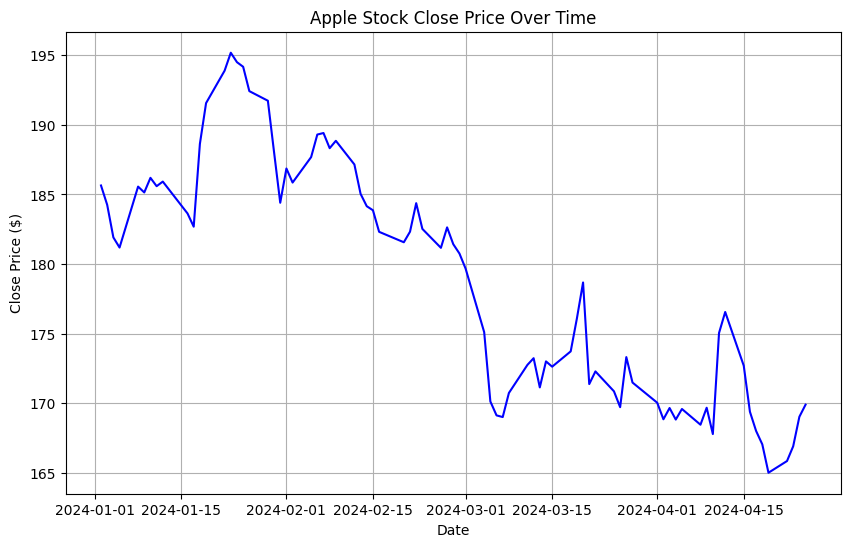

In [33]:
# Importing necessary libraries
from matplotlib import pylab as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yfin

# Allowing pandas_datareader to use Yahoo Finance
yfin.pdr_override()

# Define today's date
today = datetime.datetime.today()
formatted_date = today.strftime("%Y-%m-%d")

# Fetching stock data for Apple ('AAPL') from January 1, 2024, to today
df1 = web.DataReader('AAPL', start='2024-01-01', end=formatted_date)

# Convert index to datetime format
df1.index = pd.to_datetime(df1.index)

# 1. How many rows does the dataframe have?
num_rows = len(df1)
print("Number of rows in the DataFrame:", num_rows)

# 2. What are the column names?
column_names = df1.columns
print("Column names in the DataFrame:", column_names)

# 3. What was the highest stock value on April 4th?
max_stock_value_april_4th = df1.loc['2024-04-04', 'High'].max()
print("Highest stock value on April 4th:", max_stock_value_april_4th)

# 4. Choose a column from this stock and plot it (Close column)
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Close'], color='blue')
plt.title('Apple Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.show()
